In [114]:
# imports

%matplotlib inline

from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# create Mongo Client to retrieve collections

client = MongoClient('localhost', 27017)
client.database_names()
reddit_db = client.reddit
collection = reddit_db.post

In [116]:
# convert the collection into a Python dataframe

collection.find_one()
reddit_df = pd.DataFrame(list(collection.find()))
reddit_df.head()

,_id,comments,date,label,link,title,upvotes
0,57424a6d0a6e1f307c378595,[],[],[],[],[Tried SumoJerky yet? You get to try 2+ beef j...,•
1,57424a6d0a6e1f307c378596,[14 comments],[2016-05-21T00:03:42+00:00],[],[self.technology],[Got a tech question or want to discuss tech? ...,0
2,57424a6d0a6e1f307c378597,[1117 comments],[2016-05-22T13:07:48+00:00],[Politics],[commondreams.org],[Children of Striking Verizon Workers Join Pic...,5103
3,57424a6d0a6e1f307c378598,[26 comments],[2016-05-22T14:47:38+00:00],[Politics],[theguardian.com],[How the Pentagon punished NSA whistleblowers ...,739
4,57424a6d0a6e1f307c378599,[5 comments],[2016-05-22T19:15:23+00:00],[Hardware],[xtraqt.com],[University Study Discovers Fitbit’s Inaccurat...,80


In [117]:
# delete _id column 

reddit_df.drop(['_id'], axis = 1, inplace = True)

,comments,date,label,link,title,upvotes
0,[],[],[],[],[Tried SumoJerky yet? You get to try 2+ beef j...,•
1,[14 comments],[2016-05-21T00:03:42+00:00],[],[self.technology],[Got a tech question or want to discuss tech? ...,0
2,[1117 comments],[2016-05-22T13:07:48+00:00],[Politics],[commondreams.org],[Children of Striking Verizon Workers Join Pic...,5103
3,[26 comments],[2016-05-22T14:47:38+00:00],[Politics],[theguardian.com],[How the Pentagon punished NSA whistleblowers ...,739
4,[5 comments],[2016-05-22T19:15:23+00:00],[Hardware],[xtraqt.com],[University Study Discovers Fitbit’s Inaccurat...,80


In [118]:
# convert all columns into strings

index_list = list(reddit_df.columns.values)
index_list = index_list[:6]

for i in index_list:
    for i in reddit_df[i]:
        if len(i) == 0:
            i.append("0")

for i in index_list:
    reddit_df[i] = ["".join(x).encode('ascii','ignore') for x in reddit_df[i]]

In [119]:
# filter out 0 values in date (this means that the post is an ad)
# retrieve the number only from comments column

reddit_df = reddit_df[reddit_df['date'] != '0']
reddit_df = reddit_df[reddit_df['upvotes'] != '']

reddit_df['comments'] = reddit_df['comments'].apply(lambda x: x.split(' ')[0])

reddit_df = reddit_df[reddit_df['comments'] != 'comment']

In [120]:
# convert 'upvotes' and 'comments' column from string into int

reddit_df['upvotes'] = [int(float(x)) for x in reddit_df['upvotes']]
reddit_df['comments'] = [int(float(x)) for x in reddit_df['comments']]

In [122]:
#create a column to get ratio of 'upvotes' : 'comments'

reddit_df['up_com'] = reddit_df['upvotes']/reddit_df['comments']
reddit_df.drop_duplicates('title', keep = 'first', inplace = True)

In [123]:
label_ind = sorted(reddit_df.label.unique())
temp = reddit_df.groupby('label').mean()

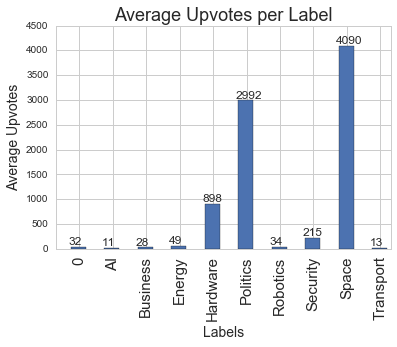

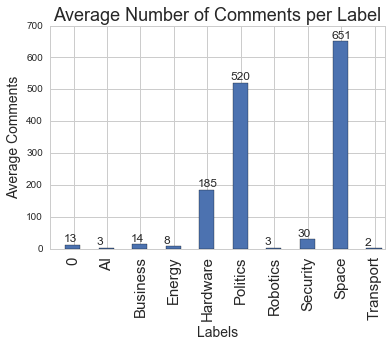

In [124]:
# bar graphs

sns.set_style("whitegrid")
pos = np.arange(len(label_ind)) + 0.45
plt.subplot2grid((1,3), (0,0), colspan=12)
plt.bar(pos, temp['upvotes'], width = .45)
plt.xticks(np.arange(len(label_ind))+ .7, label_ind, fontsize = 15, rotation = 'vertical')

for i in range(len(temp['upvotes'])):
    plt.text(i + 0.38, temp['upvotes'][i] + 50, int(round(temp['upvotes'][i])), fontsize = 12)
plt.xticks(np.arange(len(label_ind))+ .7, label_ind, fontsize = 15, rotation = 'vertical')
plt.title("Average Upvotes per Label", fontsize = 18)
plt.xlabel("Labels", fontsize = 14)
plt.ylabel("Average Upvotes", fontsize = 14)

plt.show()

plt.bar(pos, temp['comments'], width = .45)
plt.xticks(np.arange(len(label_ind))+ .7, label_ind, fontsize = 15, rotation = "vertical")
plt.title("Average Number of Comments per Label", fontsize = 18)
plt.xlabel("Labels", fontsize = 14)
plt.ylabel("Average Comments", fontsize = 14)
for i in range(len(temp['comments'])):
    plt.text(i + 0.4, temp['comments'][i] + 10, int(round(temp['comments'][i])), fontsize = 12)

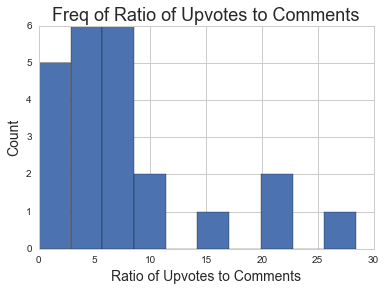

In [125]:
sns.set_style("whitegrid")
plt.hist(reddit_df.up_com)
plt.xlabel('Ratio of Upvotes to Comments', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title("Freq of Ratio of Upvotes to Comments", fontsize = 18)